## Installing and Importing important libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = load_boston()

## Preparing the dataset

In [3]:
dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
df = pd.DataFrame(data=dataset.data,columns=dataset.feature_names)

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


## Method-1: Trimming the outliers from the dataset

<AxesSubplot:>

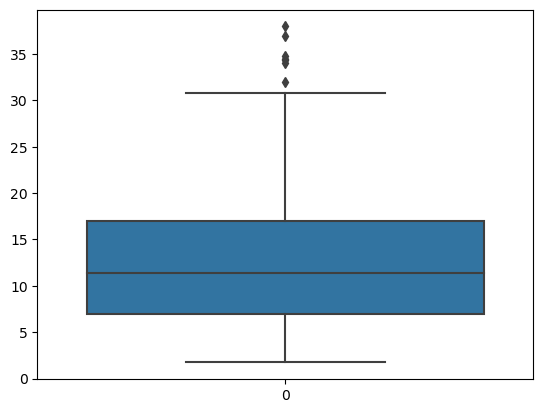

In [8]:
sns.boxplot(data=df['LSTAT'])

In [9]:
# these asterisks are outliers in the "LSTAT" column

In [10]:
def limiter(data,column):
    IQR = df[column].quantile(0.75)-df[column].quantile(0.25)
    upper_range = df[column].quantile(0.75) + (IQR*1.5)
    lower_range = df[column].quantile(0.25) - (IQR*1.5)
    return upper_range,lower_range

In [11]:
u_lstat,l_lstat = limiter(df,"LSTAT")

In [12]:
u_lstat,l_lstat

(31.962500000000006, -8.057500000000005)

In [13]:
outliers_LSTAT = np.where(df['LSTAT']>u_lstat,True,np.where(df['LSTAT']<l_lstat,True,False))

In [14]:
trimmed_df = df.loc[~outliers_LSTAT]

In [15]:
trimmed_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


<AxesSubplot:>

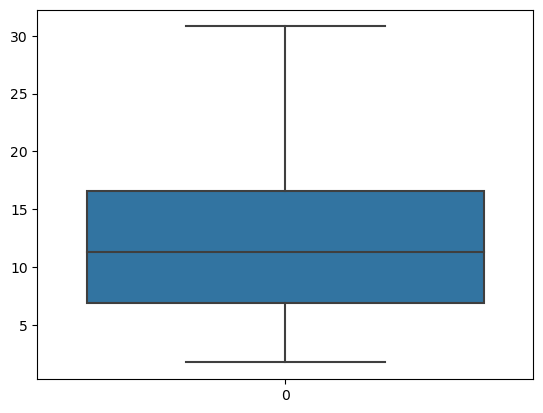

In [16]:
sns.boxplot(data=trimmed_df['LSTAT'])

In [17]:
# as we can see from the boxplot the outliers are removed from the dataset.

## Method-2: Winsorization:

#### The process by which we can replace outliers with some arbitrary value closer to the mean of distribution

In [18]:
def winsorize(data,column,upper_limit,lower_limit):
    return np.where(df[column]>upper_limit,upper_limit,np.where(df[column]<lower_limit,lower_limit,df[column]))

In [19]:
df['RM'] = winsorize(df,'RM',df['RM'].quantile(0.95),df['RM'].quantile(0.05))

<AxesSubplot:>

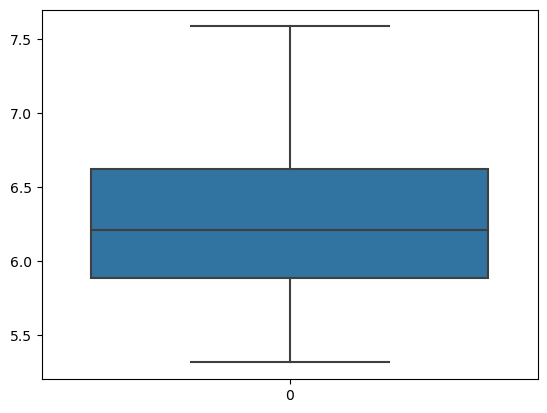

In [20]:
sns.boxplot(data=df['RM'])

## Method-3: Capping the variable  at arbitrary maximum and minimum values:

#### We can perform this method using two variations:
#### 1) By replacing outliers with mean and standard deviation. 
#### 2) By replacing outliers with IQR proximity rule.

### Using mean and standard deviation:

In [21]:
def mean_std_cap(data,column):
    upper_limit = df[column].mean() + (3*(df[column].std()))
    lower_limit = df[column].mean() - (3*(df[column].std()))
    return upper_limit,lower_limit

In [22]:
RM_upper_limit, RM_lower_limit = mean_std_cap(df, 'RM')
LSTAT_upper_limit, LSTAT_lower_limit = mean_std_cap(df, 'LSTAT')
CRIM_upper_limit, CRIM_lower_limit = mean_std_cap(df, 'CRIM')

In [23]:
CRIM_upper_limit, CRIM_lower_limit

(29.418158873309714, -22.19111175868521)

In [24]:
df['CRIM']= np.where(df['CRIM'] > CRIM_upper_limit,
 CRIM_upper_limit,
 np.where(df['CRIM'] < CRIM_lower_limit,
 CRIM_lower_limit, df['CRIM']))

### Using IQR:

In [25]:
def IQR_cap(data,column):
    IQR = df[column].quantile(0.75)-df[column].quantile(0.25)
    upper_limit = df[column].quantile(0.75)+(1.5*IQR)
    lower_limit = df[column].quantile(0.25)-(1.5*IQR)
    return upper_limit,lower_limit

In [26]:
RM_upper_lim, RM_lower_lim = IQR_cap(df, 'RM')
LSTAT_upper_lim, LSTAT_lower_lim = IQR_cap(df, 'LSTAT')
CRIM_upper_lim, CRIM_lower_lim = IQR_cap(df, 'CRIM')

In [27]:
df['CRIM']= np.where(df['CRIM'] > CRIM_upper_lim,
 CRIM_upper_lim,
 np.where(df['CRIM'] < CRIM_lower_lim,
 CRIM_lower_lim, df['CRIM']))